# Imports

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(1)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [62]:
filename = "/Users/test/Downloads/Tweets.csv"

# EDA Analysis

In [63]:
df_ = pd.read_csv(filename)
df_

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [64]:
print(f"The amount of NA values is: {df_.isna().sum()}")
print(f"The Amount of Duplicate Values is: {df_.duplicated().sum()}")

The amount of NA values is: tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64
The Amount of Duplicate Values is: 36


# Dropping null or duplicate values results in the entire dataset being removed

In [65]:
df_.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [66]:
df_.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

# Create df of only the features we want

In [67]:
df = df_[["airline_sentiment", "text"]].copy()

# Check Class Imbalances

<Axes: xlabel='airline_sentiment'>

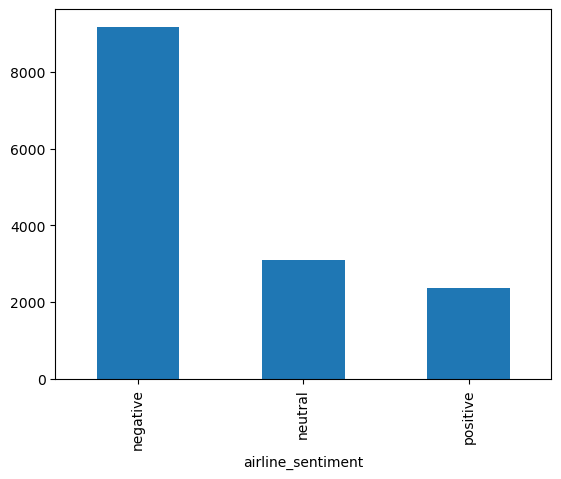

In [68]:
df['airline_sentiment'].value_counts().plot.bar()

In [69]:

from collections import Counter

def check_class_imbalance(df):
  
  y = df.values[:,-1]
  counter = Counter(y)
  
  for k,v in counter.items():
    per = v/len(y) * 100
    print("Class=%s, Count=%d, Percentage=%.3f%%" % (k,v, per))

In [70]:
target_mapping = {"positive":1, "neutral":0, "negative":2}

df['target'] = df['airline_sentiment'].apply(lambda x: target_mapping[x])

<Axes: xlabel='airline_sentiment'>

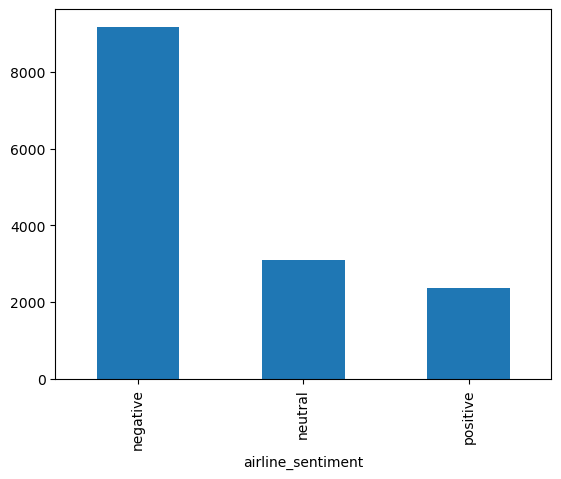

In [71]:
df['airline_sentiment'].value_counts().plot.bar()

In [72]:
df_train, df_test = train_test_split(df)

In [73]:
df_train.head()

,airline_sentiment,text,target
1041,negative,@united Change made in just over 3 hours. For ...,2
1989,negative,@united The engineer that designed the 787 doo...,2
14309,negative,"@AmericanAir 11 out of 11 delayed flights, you...",2
1711,negative,@united ouch not fair,2
11542,negative,@USAirways stuck in cae need reFlight Booking ...,2


In [85]:
vectorizer = TfidfVectorizer(max_features=2000)

In [86]:
X_train = vectorizer.fit_transform(df_train['text'])

In [87]:
X_train

<10980x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 157852 stored elements in Compressed Sparse Row format>

In [88]:
X_test = vectorizer.transform(df_test["text"])

In [91]:
y_train, y_test = df_train['target'], df_test['target']

In [92]:
model = LogisticRegression(max_iter=500)

model.fit(X_train, y_train)

print("Train Acc:", model.score(X_train, y_train))
print("Test Acc:", model.score(X_test, y_test))

Train Acc: 0.8548269581056467
Test Acc: 0.7991803278688525


In [93]:
Pr_train = model.predict_proba(X_train)
Pr_test = model.predict_proba(X_test)


print("Train AUC:", roc_auc_score(y_train, Pr_train, multi_class='ovo'))
print("Test AUC:", roc_auc_score(y_test, Pr_test, multi_class='ovo'))

Train AUC: 0.9430949051217267
Test AUC: 0.8954030345018156


In [95]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [97]:
cm = confusion_matrix(y_train, P_train, normalize='true')
cm

array([[0.64645161, 0.0516129 , 0.30193548],
       [0.10067873, 0.69966063, 0.19966063],
       [0.0268622 , 0.00813126, 0.96500653]])

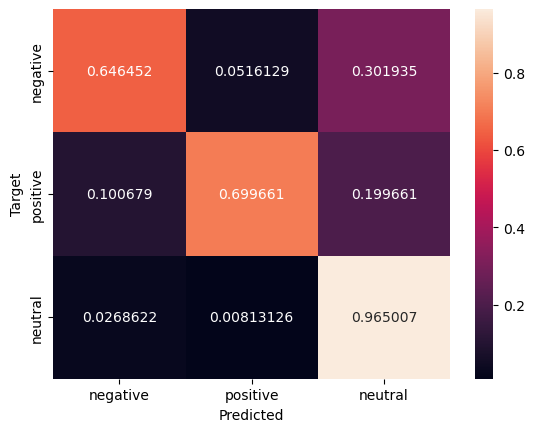

In [100]:
def plot_cm(cm):
  classes = ['negative', 'positive', 'neutral']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sns.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

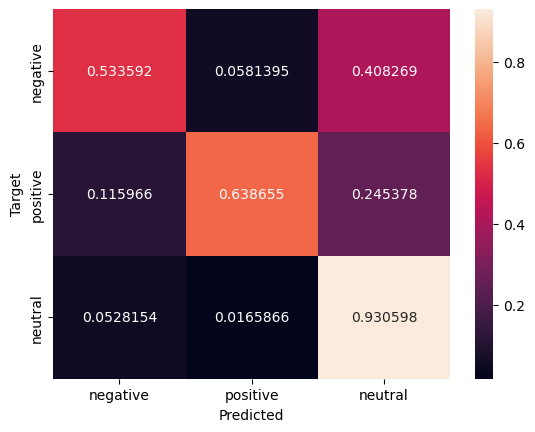

In [101]:
cm_test = confusion_matrix(y_test, P_test,normalize='true')

plot_cm(cm_test)

In [105]:
binary_target_list = [target_mapping['positive'], target_mapping['negative']]
df_b_train = df_train[df_train['target'].isin(binary_target_list)]
df_b_test = df_test[df_test['target'].isin(binary_target_list)]

In [106]:
df_b_train.head()

,airline_sentiment,text,target
1041,negative,@united Change made in just over 3 hours. For ...,2
1989,negative,@united The engineer that designed the 787 doo...,2
14309,negative,"@AmericanAir 11 out of 11 delayed flights, you...",2
1711,negative,@united ouch not fair,2
11542,negative,@USAirways stuck in cae need reFlight Booking ...,2


In [107]:
X_train = vectorizer.fit_transform(df_b_train['text'])
X_test = vectorizer.transform(df_b_test['text'])

In [108]:
y_train = df_b_train['target']
y_test = df_b_test['target']

In [109]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)


print("Train Acc:", model.score(X_train, y_train))
print("Test Acc:", model.score(X_test, y_test))

Train Acc: 0.9300982091276718
Test Acc: 0.9147609147609148


In [110]:
Pr_train = model.predict_proba(X_train)[:,1]
Pr_test = model.predict_proba(X_test)[:,1]
print("Train AUC:", roc_auc_score(y_train, Pr_train))
print("Test AUC:", roc_auc_score(y_test, Pr_test))

Train AUC: 0.9790315809115082
Test AUC: 0.9533010061292085


In [111]:
model.coef_

array([[ 0.25739278,  0.13377981,  0.34118084, ..., -0.49951607,
        -0.00725632,  0.61652739]])

(array([  2.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   3.,   1.,
          2.,   4.,   2.,   2.,  11.,  44.,  86., 227., 550., 776., 183.,
         60.,  25.,  12.,   2.,   3.,   2.,   0.,   2.]),
 array([-8.1579455 , -7.74475161, -7.33155772, -6.91836383, -6.50516994,
        -6.09197605, -5.67878216, -5.26558827, -4.85239439, -4.4392005 ,
        -4.02600661, -3.61281272, -3.19961883, -2.78642494, -2.37323105,
        -1.96003717, -1.54684328, -1.13364939, -0.7204555 , -0.30726161,
         0.10593228,  0.51912617,  0.93232006,  1.34551394,  1.75870783,
         2.17190172,  2.58509561,  2.9982895 ,  3.41148339,  3.82467728,
         4.23787117]),
 <BarContainer object of 30 artists>)

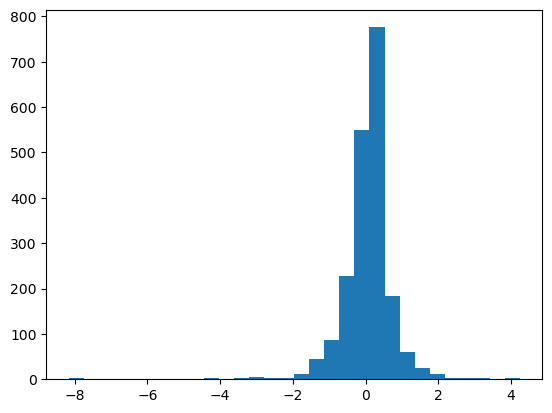

In [112]:
plt.hist(model.coef_[0],bins=30)